In [10]:
!pip install catboost

In [11]:
# CatBoost Algorithm
#  CatBoost is a state-of-the-art open-source gradient boosting on decision trees library. It's simple and easy to use. And is now regularly one of the top algorithms used in data science competitions as it produces very good results without extensive data clean-up or feature engineering.

In [12]:
#import necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from catboost import CatBoostClassifier

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
#load the dataset 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
#check the missing values 
df.isnull().sum().sort_values(ascending=False)


deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [16]:
#impute the missing values using KNN imputer 
from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=3)
df['age'] = imputer.fit_transform(df[['age']])

#impute the missing values of embark and embark town with mode 
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

#drop the columns
df.drop(['deck', 'embark_town', 'alive'], axis=1, inplace=True)

#check the missing values
df.isnull().sum().sort_values(ascending=False)



survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [19]:
# convert each category column to category
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
# add this as a new column in the dataframe
df[categorical_cols] = df[categorical_cols].astype('category')

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [21]:
df[categorical_cols]

,sex,embarked,class,who
0,male,S,Third,man
1,female,C,First,woman
2,female,S,Third,woman
3,female,S,First,woman
4,male,S,Third,man
...,...,...,...,...
886,male,S,Second,man
887,female,S,First,woman
888,female,S,Third,woman
889,male,C,First,man


In [22]:
#split X and y
X = df.drop('survived', axis=1)
y = df['survived']

#split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Import necessary libraries
import time 
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Initialize and train CatBoost classifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=3,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=False)

# Train and fit the model 
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')


CatBoostError: features data: pandas.DataFrame column 'sex' has dtype 'category' but is not in  cat_features list

In [33]:
# run the catboost classifier
# set the timer
import time 
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Start the timer
start_time = time.time()

model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=3,
                           loss_function='Logloss',
                           eval_metric='Accuracy',
                           random_seed=42,
                           verbose=False)

# train the model
model.fit(X_train, y_train, cat_features=categorical_cols.tolist())

# predictions
y_pred = model.predict(X_test)

# evaluate the model
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred)}')

# End the timer
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


Accuracy Score: 0.8100558659217877
Confusion Matrix: 
 [[92 13]
 [21 53]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Execution time: 1.6028592586517334 seconds


<Axes: >

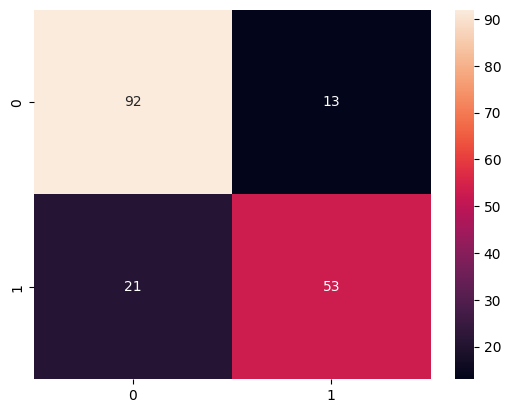

In [34]:
#plot confusion matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')